# Step 9 Instacart Stakeholder Report

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Stakeholders Key Questions](#2.-Stakeholders-Key-Questions)
* [3. Importing Data](#3.-Importing-Data)
    * [3.1 Importing Libraries](#3.1-Importing-Libraries)
    * [3.2 Importing Data](#3.2-Importing-Data)
* [4. Schedule Ads](#4.-Schedule-Ads)
* [5. Timing Expenditure Habits](#5.-Timing-Expenditure-Habits)
* [6. Price Tags](#6.-Price-Tags)
* [7. Frequency of Product Orders per Department](#7.-Frequency-of-Product-Orders-Per-Department)
* [8. Customers and Ordering Behaviors](#8.-Customer-and-Ordering-Behaviors)
    * [8.1 Brand Loyalty Distribution](#8.1-Brand-Loyalty-Distribution)
    * [8.2 Ordering Habits and Loyalty](#8.2-Ordering-Habits-and-Loyalty)
    * [8.3 Ordering Habits and Regions](#8.3-Ordering-Habits-and-Regions)
    * [8.4 Age and Family Status](#8.4-Age-and-Family-Status)
    * [8.5 Demographic Insights](#8.5-Demographic-Insights)
* [9. Recommnedations](#9.-Recommendations)

# 1. Introduction

The stakeholders of Instacart are closely monitoring the wide range of customers in their database and the unique buying behaviors they display. They are considering a more targeted marketing strategy because they realize that a one-size-fits-all approach to marketing will not be sufficient. Their objective is to measure the effect on product sales by implementing customized marketing campaigns that target various customer segments. By connecting the appropriate consumer profiles with the products that are most relevant to them, Instacart will be able to better tailor its approach with the aid of this analysis.


# 2. Stakeholder Key Questions

The stakeholders are seeking insights into various aspects of customer behavior and sales patterns to optimize their marketing and sales strategies. They have identified a series of critical questions to address:

- The sales team is eager to understand the peak days and times for orders to strategically place advertisements during slower periods to potentially increase sales during those times.

- They are also interested in identifying times of day when customers tend to spend more money to tailor the type of products advertised during these high-spending windows.

- Recognizing the vast range of product prices, the marketing and sales departments want to classify these into simpler price range categories to better focus their marketing initiatives.

- They seek to ascertain which product categories are most popular, aiming to discover which departments are seeing the highest order frequencies.

- The teams are also curious about the diversity of customer types in their database and how these different segments may exhibit distinct ordering patterns, such as:

  a. The variation in customer brand loyalty and its distribution.
  
  b.  The regional variations in ordering habits and whether these are influenced by where customers are located.
  
  c. The potential differences in ordering habits among customers with varying levels of loyalty.
  
  d. The demographic classifications suggested by customer data and whether there's a link between age and spending power (income).
  
  e.   The possible correlations between a customer’s age, family status, and their ordering practices.

By analyzing these questions, Instacart aims to craft a marketing strategy that aligns with customer behaviors and preferences, ultimately driving sales and enhancing customer engagement.

# 3. Importing Data

## 3.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 3.2 Importing Data

In [3]:
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'

In [4]:
# Importing File
stakeholders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_der_step6.pkl'))

In [5]:
stakeholders.shape

(30992966, 32)

In [6]:
stakeholders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_sequence,reordered,product_name,...,max_order_number,price_range_products,busiest_days,busiest_period_of_day,region,loyalty_flag,mean_price_per_user,type_of_spender,median_days_since_prior_order,usage_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,10,mid-range,Regular days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Most orders,South,New,6.367797,Low spender,20.5,Non-frequent customer


In [8]:
# Creating subset to reduce 

variables = ['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',  'days_since_prior_order', 'product_id', 'product_name',  'department_id', 'prices', 'Age', 'No._of_dependants', 'family_status', 'income', 'price_range_products', 'region', 'loyalty_flag', 'type_of_spender', 'usage_frequency']

stakeholders = stakeholders.loc[:, variables]

In [9]:
stakeholders.shape

(30992966, 19)

In [10]:
stakeholders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,Age,No._of_dependants,family_status,income,price_range_products,region,loyalty_flag,type_of_spender,usage_frequency
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer


In [11]:
# Exporting the df 
stakeholders.to_pickle(os.path.join(path, '02 Data','Prepared data', 'stakeholders.pkl'))

In [12]:
# Importing the smaller size so there will not be any issues with processing data
stakeholders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'stakeholders.pkl'))

In [13]:
stakeholders.shape

(30992966, 19)

# 4. Schedule Ads

In order to increase revenue, the marketing team should understand which days of the week are the busiest and which hours of the day contain the most activity on the app.

## Busiest Days of The Week

In [15]:
# Counting the values of which day are the busiest of the week
stakeholders['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    5913859
1    5417064
6    4294962
5    4037350
2    4028494
3    3672954
4    3628283
Name: count, dtype: int64

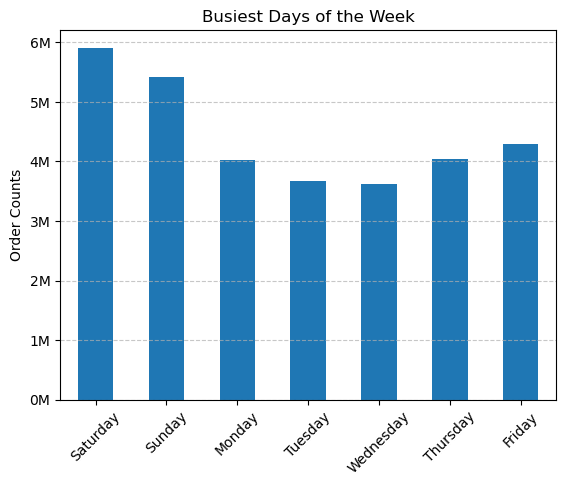

In [18]:
# Converting variable as "category" for consistancy
stakeholders['orders_day_of_week'] = stakeholders['orders_day_of_week'].astype('category')

# Defining the days of the week for each variable
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Displaying the frequency
ax = stakeholders['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.title("Busiest Days of the Week")
plt.ylabel("Order Counts") #not as single orders, but as order volumen

# Remove main x-axis label
ax.set_xlabel("")

# Customize x-axis labels
ax.set_xticklabels(day_names, rotation=45)

# Converting values in y-axis to display millions for clairty
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'busiest day of the weekSTEP 9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

## Busiest Hours of The Day

In [19]:
# Counting the values of each column for accurate representation of "order_hour_of_day"
stakeholders['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2652317
11    2617229
14    2570213
13    2541527
15    2538253
12    2497997
16    2415839
9     2366037
17    1984069
8     1660891
18    1552540
19    1194918
20     931746
7      864069
21     763813
22     607550
23     384838
6      281307
0      208214
1      109705
5       84514
2       65743
4       50802
3       48835
Name: count, dtype: int64

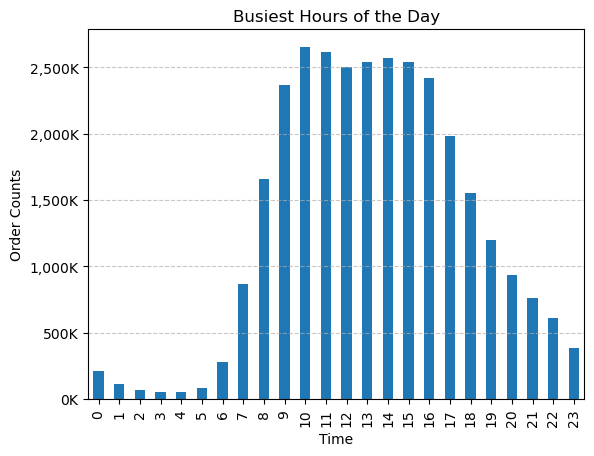

In [20]:
# Plotting frequency of a variable
ax = stakeholders['order_hour_of_day'].value_counts().sort_index().plot.bar()

plt.title("Busiest Hours of the Day")
plt.xlabel("Time")
plt.ylabel("Order Counts") #not as single orders, but as order volumen

# Converting y-axis values to the thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'busiest hours of the daySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 5. Timing Expenditure Habits

## Sampling Data

In [21]:
# To ensure that a subset accurately reflects the overall dataset, the rows chosen must be randomized.
# With a division of 70/30, the smaller 30% sample should statistically mirror the characteristics of the larger 70% sample, albeit with fewer rows.
# The 30% portion of the dataframe is utilized for visualization purposes, while the 70% is reserved for in-depth data analysis."
np.random.seed(4)
dev = np.random.rand(len(stakeholders)) <= 0.7

In [22]:
# Splitting subsets, "big" is where 70 percent of the sample will be stored
big = stakeholders[dev]

In [23]:
# In "small" we will be storing 30 percent of the dataframe
small = stakeholders[~dev]

In [24]:
# Double checking the length
len(stakeholders)

30992966

In [25]:
# Big and Small must equal to the whole length
len(big) + len (small)

30992966

They match!

## Product Price Per Hour

In [26]:
# creating dataframe to reduce ram usage
df = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Price')

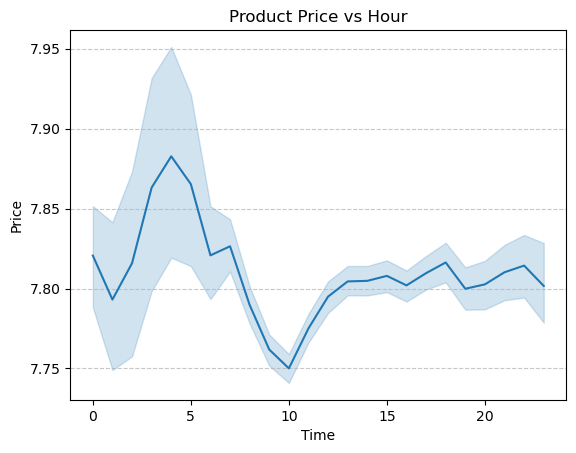

In [27]:
# Creating the line chart
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Product Price vs Hour")
plt.xlabel("Time")
plt.ylabel("Price")

## Total Sales Per Hour

In [28]:
# Group the hours of the day and add up the prices
grouped_hours = stakeholders.groupby('order_hour_of_day')['prices'].sum().reset_index()
grouped_hours

,order_hour_of_day,prices
0,0,1627169.4
1,1,856736.6
2,2,513173.9
3,3,382472.9
4,4,398511.7
5,5,662230.7
6,6,2200893.0
7,7,6761827.3
8,8,12945550.2
9,9,18351348.9


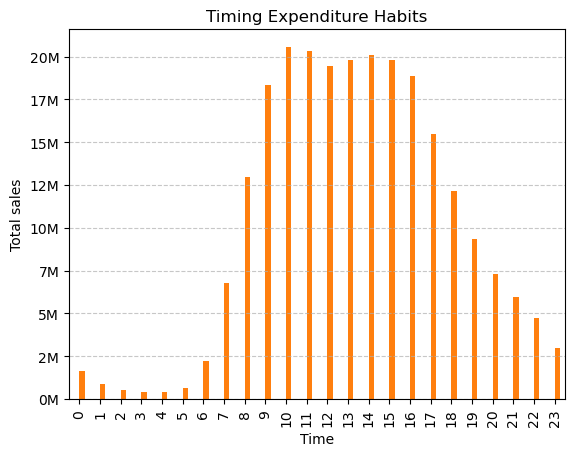

In [29]:
# Plotting frequency of a variable
ax = stakeholders.groupby('order_hour_of_day')['prices'].sum().reset_index().plot.bar(legend=None)

plt.title("Timing Expenditure Habits")
plt.xlabel("Time")
plt.ylabel("Total sales")

# Converting y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'timing expenditure habitsSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 6. Price Tags

In [30]:
# This is a count of the price ranges categorized
stakeholders['price_range_products'].value_counts(dropna = False)

price_range_products
mid-range     20920614
low-range      9674395
high-range      393080
nan               4877
Name: count, dtype: int64

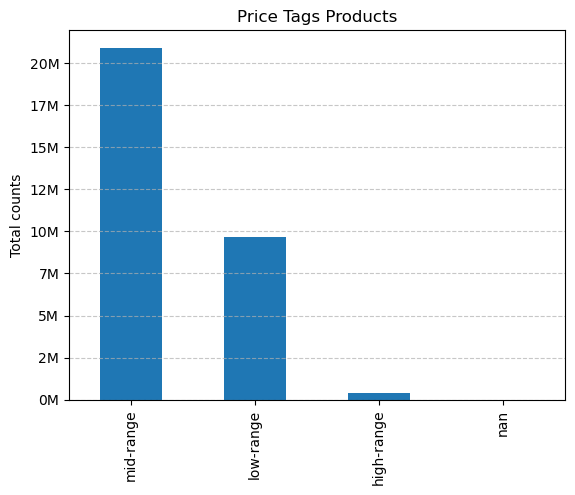

In [31]:
# Plotting frequency of a variable
ax = stakeholders['price_range_products'].value_counts(dropna = True).plot.bar(legend=None)

plt.title("Price Tags Products")
plt.ylabel("Total counts")

# Converting y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adding grid line
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove main x-axis label
ax.set_xlabel("")

# Saving the png in a specfic directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'price tags productsSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

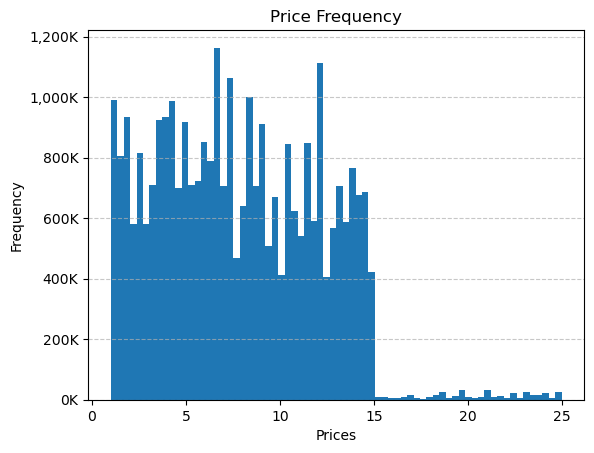

In [32]:
# Plotting the frequency of prices
ax = stakeholders['prices'].plot.hist(bins = 70)

plt.title("Price Frequency")
plt.xlabel("Prices")
plt.ylabel("Frequency")

# Adding grid line
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Converting y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'price frequencySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 7. Frequency of Product Orders Per Department

In [33]:
# Adding a dictionary for department names, into specific categories
department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [34]:
# Convert 'department_id' to string to match the keys in the dictionary
stakeholders['department_id'] = stakeholders['department_id'].astype(str)

In [35]:
# Mapping "department_name" and "department_id" from the dictionary
stakeholders['department_name'] = stakeholders['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [36]:
stakeholders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,Age,No._of_dependants,family_status,income,price_range_products,region,loyalty_flag,type_of_spender,usage_frequency,department_name
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages


In [37]:
# Counting values in the "department_name"
stakeholders['department_name'].value_counts(dropna = False)

department_name
produce            9079276
dairy eggs         5191364
snacks             2766406
beverages          2573822
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [38]:
# Checking the parameters set
stakeholders.groupby('department_name').agg({'department_id' : ['min', 'max']})

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

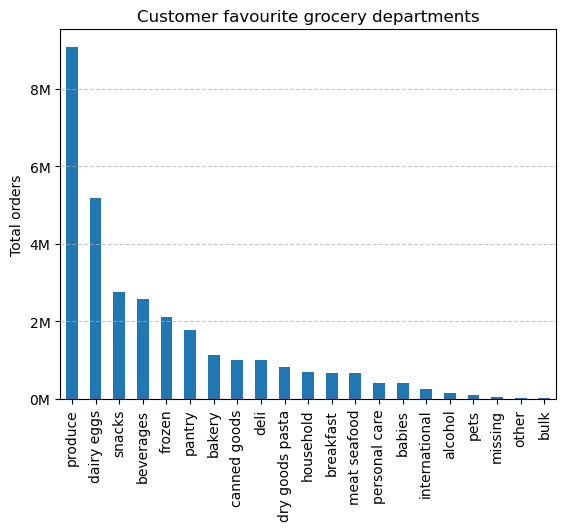

In [43]:
# Plotting frequency of a variable
ax = stakeholders['department_name'].value_counts(dropna = False).plot.bar(legend=None)

plt.title("Customer favourite grocery departments")
plt.ylabel("Total orders") #not single orders but order volumens 

# Converting y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove main x-axis label
ax.set_xlabel("")

# Save the plot as png in a directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'department order frequencySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 8. Customers and Ordering Behaviors

The marketing and sales divisions are especially focused on the diverse customer segments within their system and the variations in their purchasing patterns.

## 8.1 Brand Loyalty Distribution

* In line with the business strategy team's plan to implement a bonus points system for dedicated Instacart customers, a 'loyalty flag' was established in Step 6 IC Derivations and Aggregations using the following guidelines:
    - Customers with more than 40 orders are classified as “Loyal”.
    - Those who have placed more than 10 but up to 40 orders are categorized as “Regular”.
    - Customers with 10 or fewer orders are identified as “New”."

In [40]:
stakeholders['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular    15891172
Loyal      10293959
New         4807835
Name: count, dtype: int64

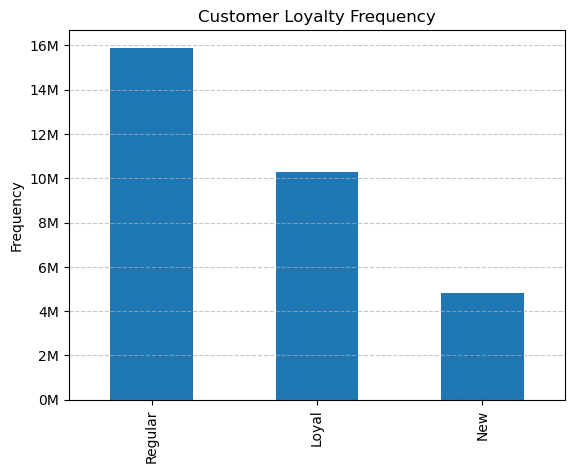

In [42]:
# Plotting the values of a variable
ax = stakeholders['loyalty_flag'].value_counts(dropna = False).plot.bar(legend=None)
#not unique customers but customers based on order volumen

plt.title("Customer Loyalty Frequency")
plt.ylabel("Frequency")

# Converting the y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adding gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove main x-axis label
ax.set_xlabel("")

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'loyalty frequencyStep9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

## 8.2 Ordering Habits and Loyalty

In [44]:
# Average orders placed by customer loyalty status
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='loyalty_flag', aggfunc='mean').reset_index()
usage_table

,loyalty_flag,days_since_prior_order
0,Loyal,6.026906
1,New,17.598809
2,Regular,12.155234


C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\816678327.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


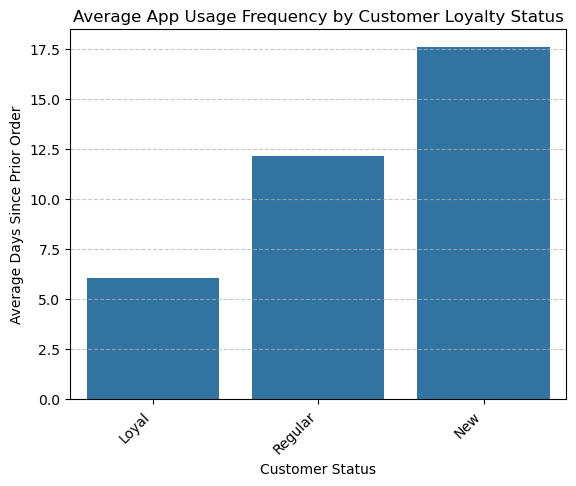

In [45]:
# Establishing the ranking of loyalty categories according to the average number of days between orders
loyalty_order = usage_table.groupby('loyalty_flag')['days_since_prior_order'].mean().sort_values().index

# Plotting the bar chart with specified order
ax = sns.barplot(x='loyalty_flag', y='days_since_prior_order', data=usage_table, order=loyalty_order, color = '#1f77b4')

plt.title("Average App Usage Frequency by Customer Loyalty Status")
plt.xlabel("Customer Status")
plt.ylabel("Average Days Since Prior Order")

# Rotating x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Adding gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_customer_loyalty_app_usage_frequencySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

## 8.3 Ordering Habits and Regions

In [46]:
# Average orders placed based on region
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='region', aggfunc='mean').reset_index()
usage_table

,region,days_since_prior_order
0,Midwest,10.909287
1,Northeast,10.774406
2,South,10.796315
3,West,10.754394


C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\3344309023.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


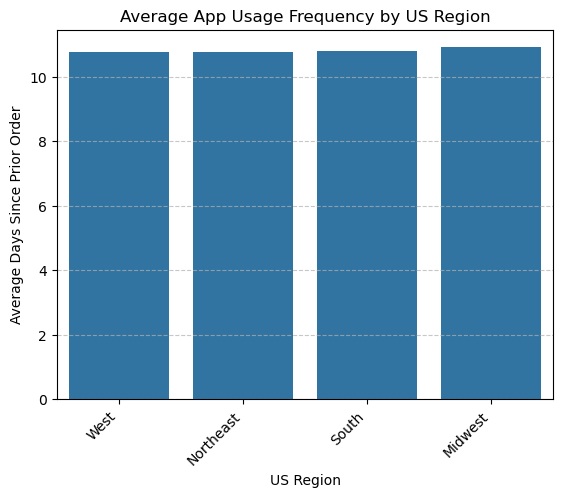

In [47]:
# Establishing the sequence of region categories based on the average duration between orders
region_order = usage_table.groupby('region')['days_since_prior_order'].mean().sort_values().index

# Plotting the bar chart with specified order
ax = sns.barplot(x='region', y='days_since_prior_order', data=usage_table, order=region_order, color = '#1f77b4')

plt.title("Average App Usage Frequency by US Region")
plt.xlabel("US Region")
plt.ylabel("Average Days Since Prior Order")

# Rotating x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Adding gridline 
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_region_app_usage_frequencySTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

## 8.4 Age and Family Status

- Is there a relationship between ordering habits and family status and age?


In [49]:
# Reduce RAM usage for specific column
df = small[['Age','No._of_dependants']]

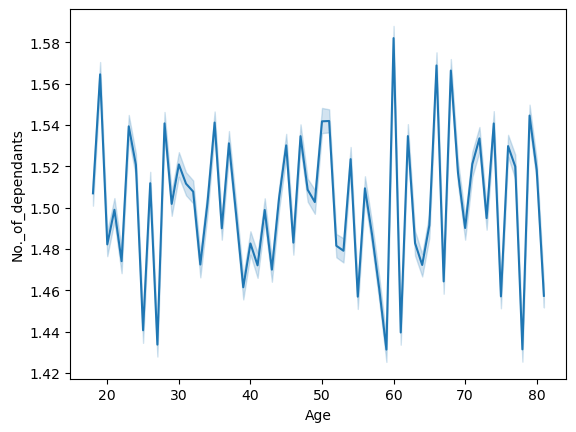

In [50]:
# Creating the line chart
line = sns.lineplot(data = df, x = 'Age',y = 'No._of_dependants')

# Family Status and Frequency of Orders

In [51]:
# Average orders of each family based on status
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='family_status', aggfunc='mean').reset_index()
usage_table

,family_status,days_since_prior_order
0,divorced/widowed,10.750533
1,living with parents and siblings,10.750641
2,married,10.821002
3,single,10.813100


C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\189844761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_order = usage_table.groupby('family_status')['days_since_prior_order'].mean().sort_values().index
C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\189844761.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


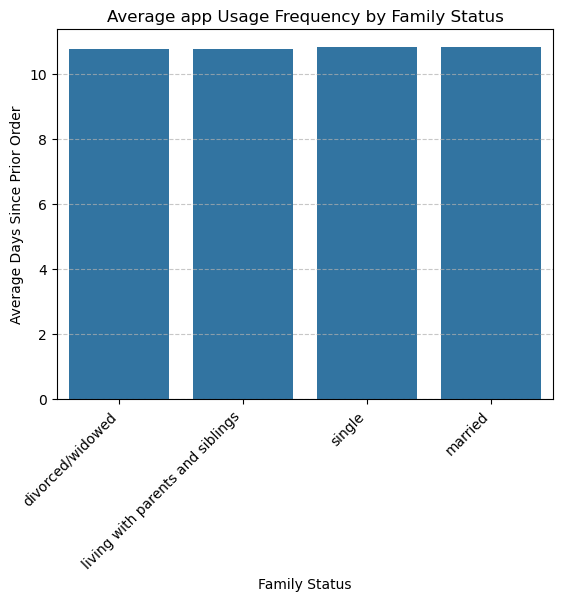

In [52]:
# Arranging family status categories in sequence according to the average number of days between orders
status_order = usage_table.groupby('family_status')['days_since_prior_order'].mean().sort_values().index

# Plotting the bar chart with specified order
ax = sns.barplot(x='family_status', y='days_since_prior_order', data=usage_table, order=status_order, color = '#1f77b4')

plt.title("Average app Usage Frequency by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Average Days Since Prior Order")

# Rotating x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Adding gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

## Family Status and Expenditure

In [53]:
# Total sales based on family status
usage_table = pd.pivot_table(stakeholders, values='prices', index='family_status', aggfunc='sum').reset_index()
usage_table

,family_status,prices
0,divorced/widowed,20664935.8
1,living with parents and siblings,11572096.5
2,married,169615014.5
3,single,39710369.2


C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\1430527998.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_order = usage_table.groupby('family_status')['prices'].sum().sort_values(ascending=False).index
C:\Users\kuohe\AppData\Local\Temp\ipykernel_24812\1430527998.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


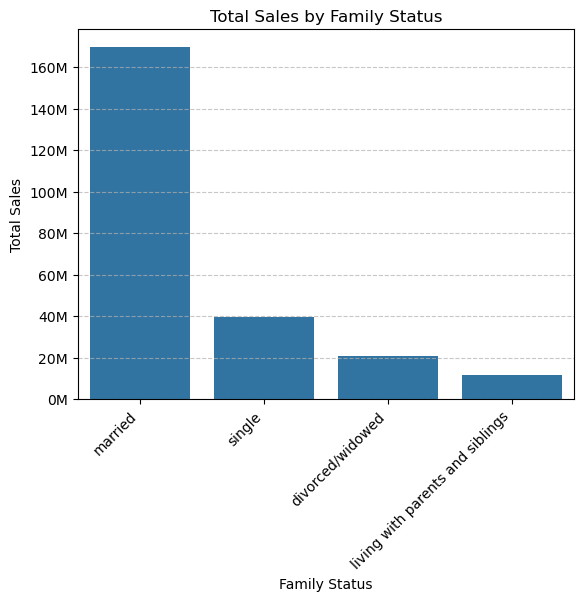

In [54]:
# Ranking family status categories according to their total sales figures
status_order = usage_table.groupby('family_status')['prices'].sum().sort_values(ascending=False).index

# Plotting the bar chart with specified order
ax = sns.barplot(x='family_status', y='prices', data=usage_table, order=status_order, color = '#1f77b4')

plt.title("Total Sales by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Total Sales")

# Rotateing x-axis labels for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

# Converting y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

# Adding gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'bar_family_status_salesSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 8.5 Demographic Insights

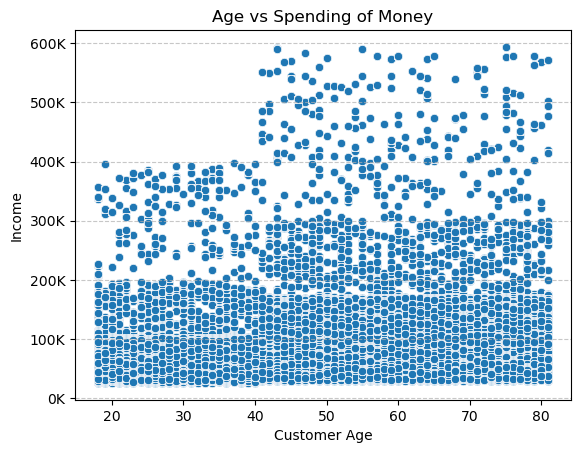

In [55]:
#Plotting age against income
scatt = sns.scatterplot(x = 'Age', y = 'income',data = stakeholders)

plt.title("Age vs Spending of Money")
plt.xlabel("Customer Age")
plt.ylabel("Income")

# Converting y-axis to display values in thousands
scatt.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

# Addnig gridline
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\kuohe\Instacart Basket Analysis 12-18-2023'
filename = 'age_vs_incomeSTEP9.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

# Show plot
plt.show()

# 9. Recommendations

For an effective targeted marketing campaign, the following strategies are recommended:

1. **Ad Placement in Off-Peak Hours**: To boost the impact of our targeted marketing, place advertisements during times with lower user activity. Our data shows that the app has the least orders on Wednesdays and Thursdays between 23:00 and 06:00.

2. **Advertising During High-Activity Periods**: Focus on advertising products from 09:00 to 16:00, a window where user spending reaches over 17 million dollars per hour. Aligning our marketing efforts with these peak hours can enhance both customer engagement and sales.

3. **Focus on Mid-Range Priced Products**: For the marketing and sales teams, simplify the product pricing approach by emphasizing products within the 5 to 15 dollar range, as these items are most popular among our user base.

4. **Emphasize Popular Grocery Departments**: Given the high order volume in departments like produce, dairy eggs, snacks, beverages, and frozen items, intensify promotions in these areas or develop strategies to increase visibility for other departments.

5. **Introduce a Loyalty Program**: Implement a loyalty program aimed at customers who make up 33.8% of all app sales. These loyal customers typically order weekly, representing a significant opportunity to enhance ongoing engagement and loyalty.

6. **Utilize Demographic and Regional Data**: Tailor marketing strategies using demographic and regional insights. All US regions and family statuses show similar frequencies in app usage, with orders placed every 10 to 11 days on average. However, married customers over 40 tend to have higher spending capabilities, accounting for sales over 160 million dollars in our database. Refine marketing approaches to leverage these demographic spending trends.